In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Reading Dataset

In [18]:

#df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
df = pd.read_csv('dataset/Life Expectancy Data.csv')
# Removing preciding space from column names
df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  10-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']
df.shape

(2938, 22)

### About Features
* Life expectancy -Life Expectancy in age
* Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - number of Measles reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* under-five deaths - Number of under-five deaths per 1000 population 
* Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS - Deaths per 1000 live births HIV/AIDS (0-4 years)
* GDP - Gross Domestic Product per capita (in USD)
* Population - Population of the country
* thinness  10-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling(years)

In [19]:
df.iloc[:,:11].head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  
0             62     0.01               71.279624         65.0     1154  19.1  
1             64     0.01               73.523582         62.0      492  18.6  
2             66     0.01               73.219243         64.0      430  18.1  
3             69     0.01               78.184215         67.0     2787  17.6  
4             71     0.01                7.097109         68.0     3013  17.2

In [20]:
df.iloc[:,11:].head()

under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  10-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                   17.2                17.3   
1  612.696514    327582.0                   17.5                17.5   
2  631.744976  31731688.0                   17.7                17.7   
3  669.959000   3696958.0                   17.9                18.0   
4   63.537231   2978599.0                   18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

# 2. Quick Look at dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [22]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [23]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  10-19 years               34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [24]:
df = df.dropna(subset='Life expectancy')
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  10-19 years               32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

* 12 independent features have null values
* Dependent feature also has null value

In [25]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000        69.224932       164.796448      30.407445   
std       4.61056         9.523867       124.292079     118.114450   
min    2000.00000        36.300000         1.000000       0.000000   
25%    2003.75000        63.100000        74.000000       0.000000   
50%    2007.50000        72.100000       144.000000       3.000000   
75%    2011.25000        75.700000       228.000000      22.000000   
max    2015.00000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2735.000000             2928.000000  2375.000000    2928.000000   
mean      4.614856              740.321185    80.960842    2427.855874   
std       4.050749             1990.930605    25.018337   11485.970937   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.905000                4.853964    77.000000       0.000000   
50%       3.770000               65.611455    92.000000      17.000000   
75%       7.715000              442.614322    97.000000     362.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2896.000000        2928.000000  2909.000000        2702.000000   
mean     38.235394          42.179303    82.548298           5.930163   
std      19.959590         160.700547    23.416674           2.483273   
min       1.000000           0.000000     3.000000           0.370000   
25%      19.300000           0.000000    78.000000           4.260000   
50%      43.350000           4.000000    93.000000           5.750000   
75%      56.100000          28.000000    97.000000           7.490000   
max      77.600000        2500.000000    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2909.000000  2928.000000    2485.000000  2.284000e+03   
mean     82.321416     1.747712    7494.210719  1.276454e+07   
std      23.706644     5.085542   14282.251492  6.103765e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.852618  1.966738e+05   
50%      93.000000     0.100000    1764.973870  1.391756e+06   
75%      97.000000     0.800000    5932.899677  7.426746e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  10-19 years  thinness 5-9 years  \
count            2896.000000         2896.000000   
mean                4.850622            4.881423   
std                 4.420829            4.509609   
min                 0.100000            0.100000   
25%                 1.600000            1.575000   
50%                 3.300000            3.400000   
75%                 7.200000            7.200000   
max                27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2768.000000  2768.000000  
mean                          0.627419    11.999639  
std                           0.210978     3.346440  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779250    14.300000  
max                           0.948000    20.700000

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'under-five deaths'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'thinness  10-19 years'}>,
        <Axes: title={'center': 'thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Scho

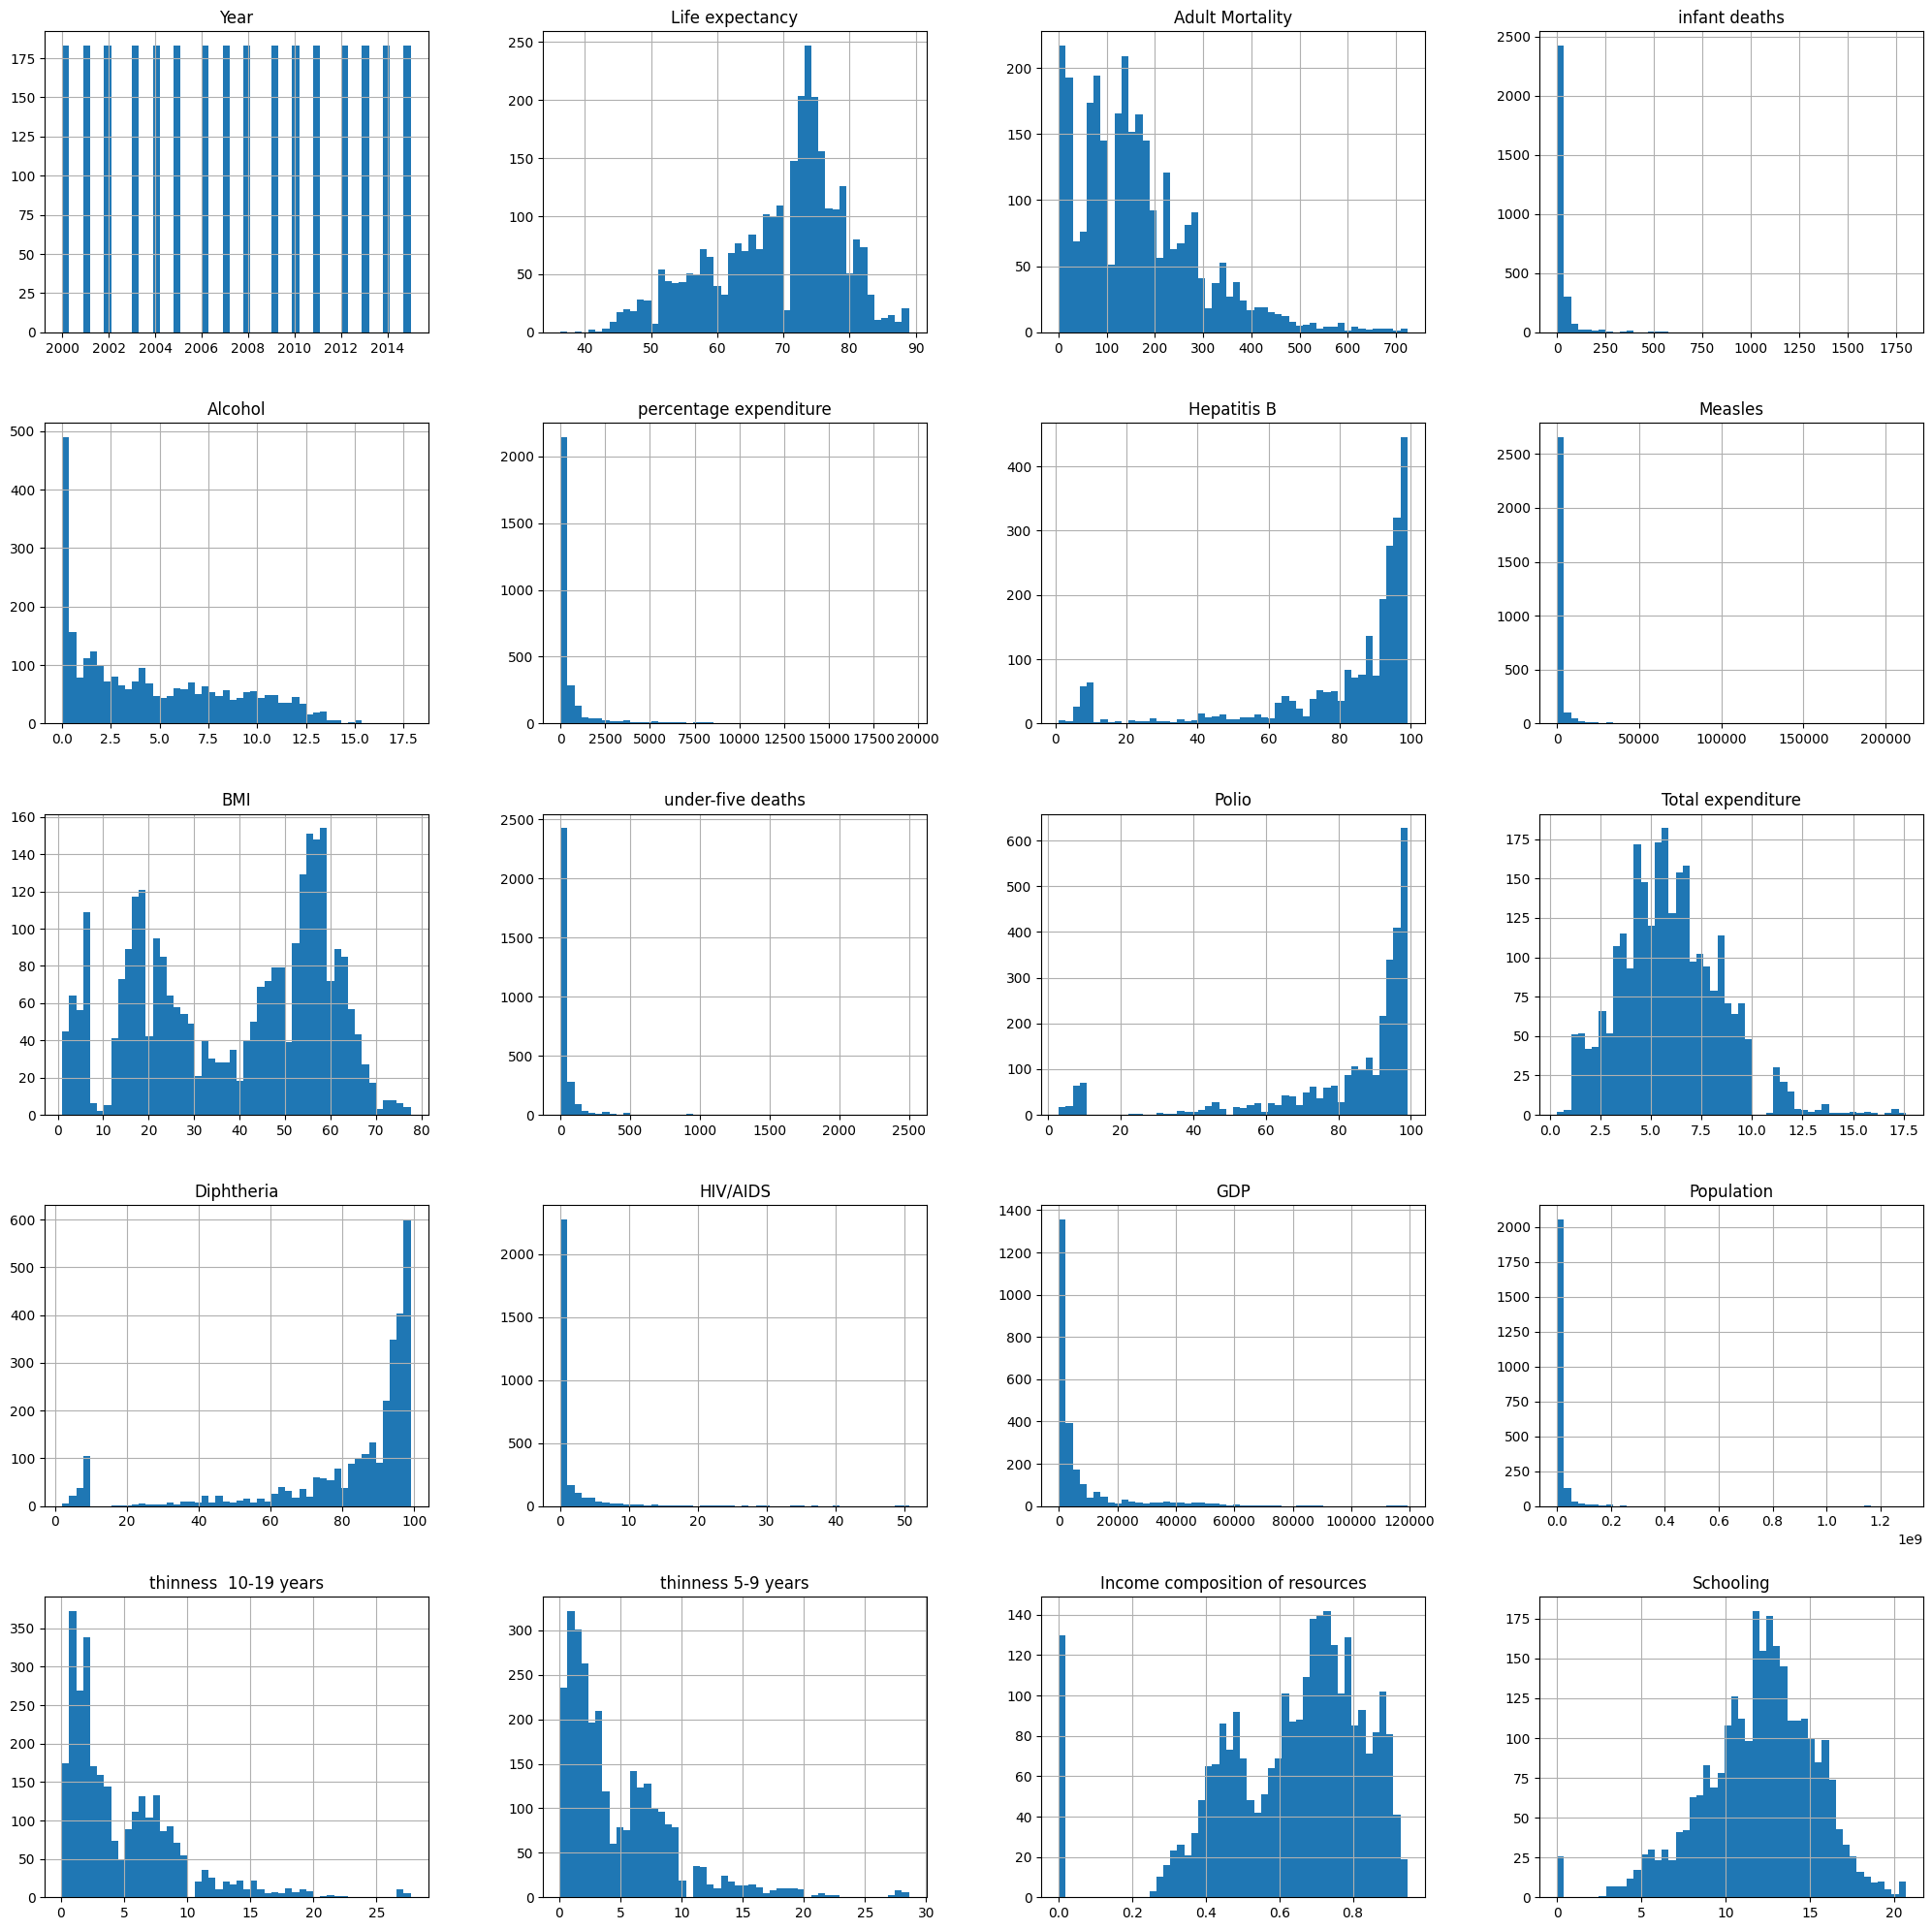

In [26]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,25))

* Most of the features are right skewed - 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles', 'under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years'
* Left skewed features - 'Hepatitis B', 'Polio', 'Diphtheria'
* 'BMI' has two tale top
* Column 'Income composition of resources', 'Schooling' has outliers

# 3. Create a Test Set

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20, random_state=42)
train.shape[0], test.shape[0]

(2342, 586)

# 4. EDA

In [28]:
# Label Encoding Status feature
train['Status'] = train['Status'].map({'Developing':1,'Developed':2})

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Country'] = le.fit_transform(train['Country'])

In [30]:
corr_matrix = train.corr(method='pearson', numeric_only=True)
corr_matrix['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.744673
Income composition of resources    0.719683
BMI                                0.568964
Status                             0.481090
Diphtheria                         0.474238
GDP                                0.461503
Polio                              0.459500
Alcohol                            0.403994
percentage expenditure             0.387111
Hepatitis B                        0.246535
Total expenditure                  0.214689
Year                               0.172242
Population                        -0.018258
Country                           -0.019435
Measles                           -0.169950
infant deaths                     -0.209330
under-five deaths                 -0.235214
thinness 5-9 years                -0.476931
thinness  10-19 years             -0.483479
HIV/AIDS                          -0.557158
Adult Mortality                   -0.695271
Name: Life expectancy, dtype: fl

In [31]:
train.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

array([[<Axes: xlabel='Measles', ylabel='Measles'>,
        <Axes: xlabel='infant deaths', ylabel='Measles'>,
        <Axes: xlabel='under-five deaths', ylabel='Measles'>,
        <Axes: xlabel='thinness 5-9 years', ylabel='Measles'>,
        <Axes: xlabel='thinness  10-19 years', ylabel='Measles'>,
        <Axes: xlabel='HIV/AIDS', ylabel='Measles'>,
        <Axes: xlabel='Adult Mortality', ylabel='Measles'>,
        <Axes: xlabel='Life expectancy', ylabel='Measles'>],
       [<Axes: xlabel='Measles', ylabel='infant deaths'>,
        <Axes: xlabel='infant deaths', ylabel='infant deaths'>,
        <Axes: xlabel='under-five deaths', ylabel='infant deaths'>,
        <Axes: xlabel='thinness 5-9 years', ylabel='infant deaths'>,
        <Axes: xlabel='thinness  10-19 years', ylabel='infant deaths'>,
        <Axes: xlabel='HIV/AIDS', ylabel='infant deaths'>,
        <Axes: xlabel='Adult Mortality', ylabel='infant deaths'>,
        <Axes: xlabel='Life expectancy', ylabel='infant deaths'>],
  

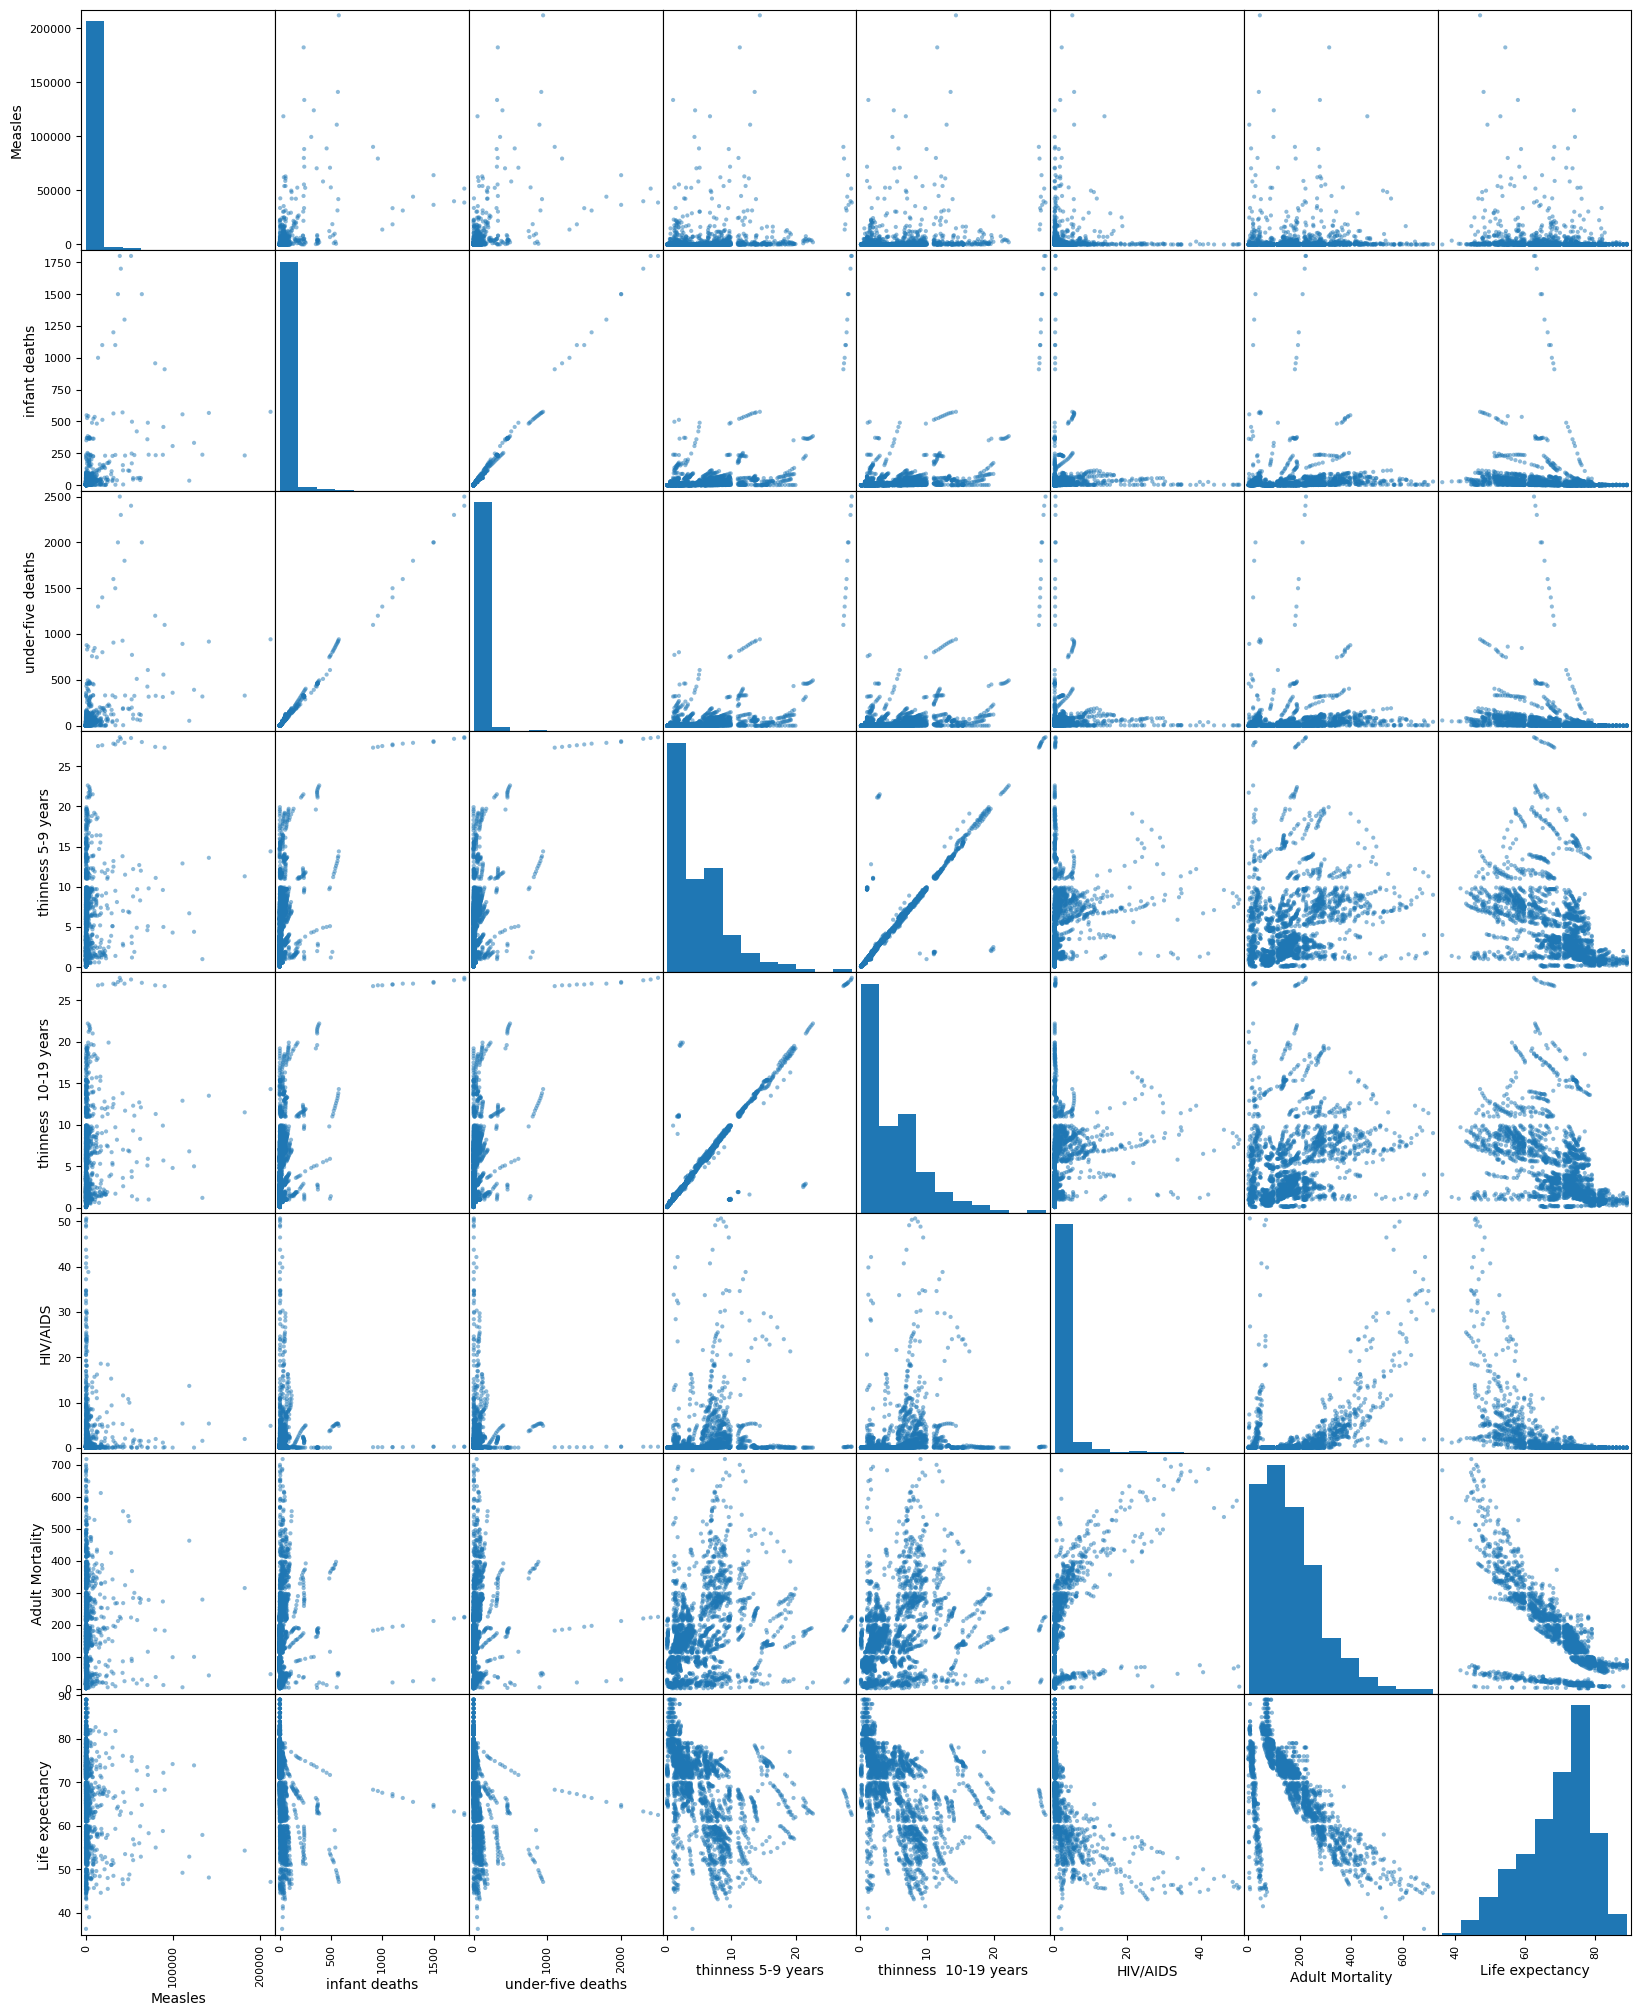

In [32]:
from pandas.plotting import scatter_matrix

attributes = ['Measles', 'infant deaths', 'under-five deaths', 'thinness 5-9 years', 'thinness  10-19 years','HIV/AIDS', 'Adult Mortality', 'Life expectancy']

scatter_matrix(train[attributes], figsize=(20,25))

array([[<Axes: xlabel='Schooling', ylabel='Schooling'>,
        <Axes: xlabel='Income composition of resources', ylabel='Schooling'>,
        <Axes: xlabel='BMI', ylabel='Schooling'>,
        <Axes: xlabel='Diphtheria', ylabel='Schooling'>,
        <Axes: xlabel='Polio', ylabel='Schooling'>,
        <Axes: xlabel='GDP', ylabel='Schooling'>,
        <Axes: xlabel='Alcohol', ylabel='Schooling'>,
        <Axes: xlabel='Life expectancy', ylabel='Schooling'>],
       [<Axes: xlabel='Schooling', ylabel='Income composition of resources'>,
        <Axes: xlabel='Income composition of resources', ylabel='Income composition of resources'>,
        <Axes: xlabel='BMI', ylabel='Income composition of resources'>,
        <Axes: xlabel='Diphtheria', ylabel='Income composition of resources'>,
        <Axes: xlabel='Polio', ylabel='Income composition of resources'>,
        <Axes: xlabel='GDP', ylabel='Income composition of resources'>,
        <Axes: xlabel='Alcohol', ylabel='Income composition of re

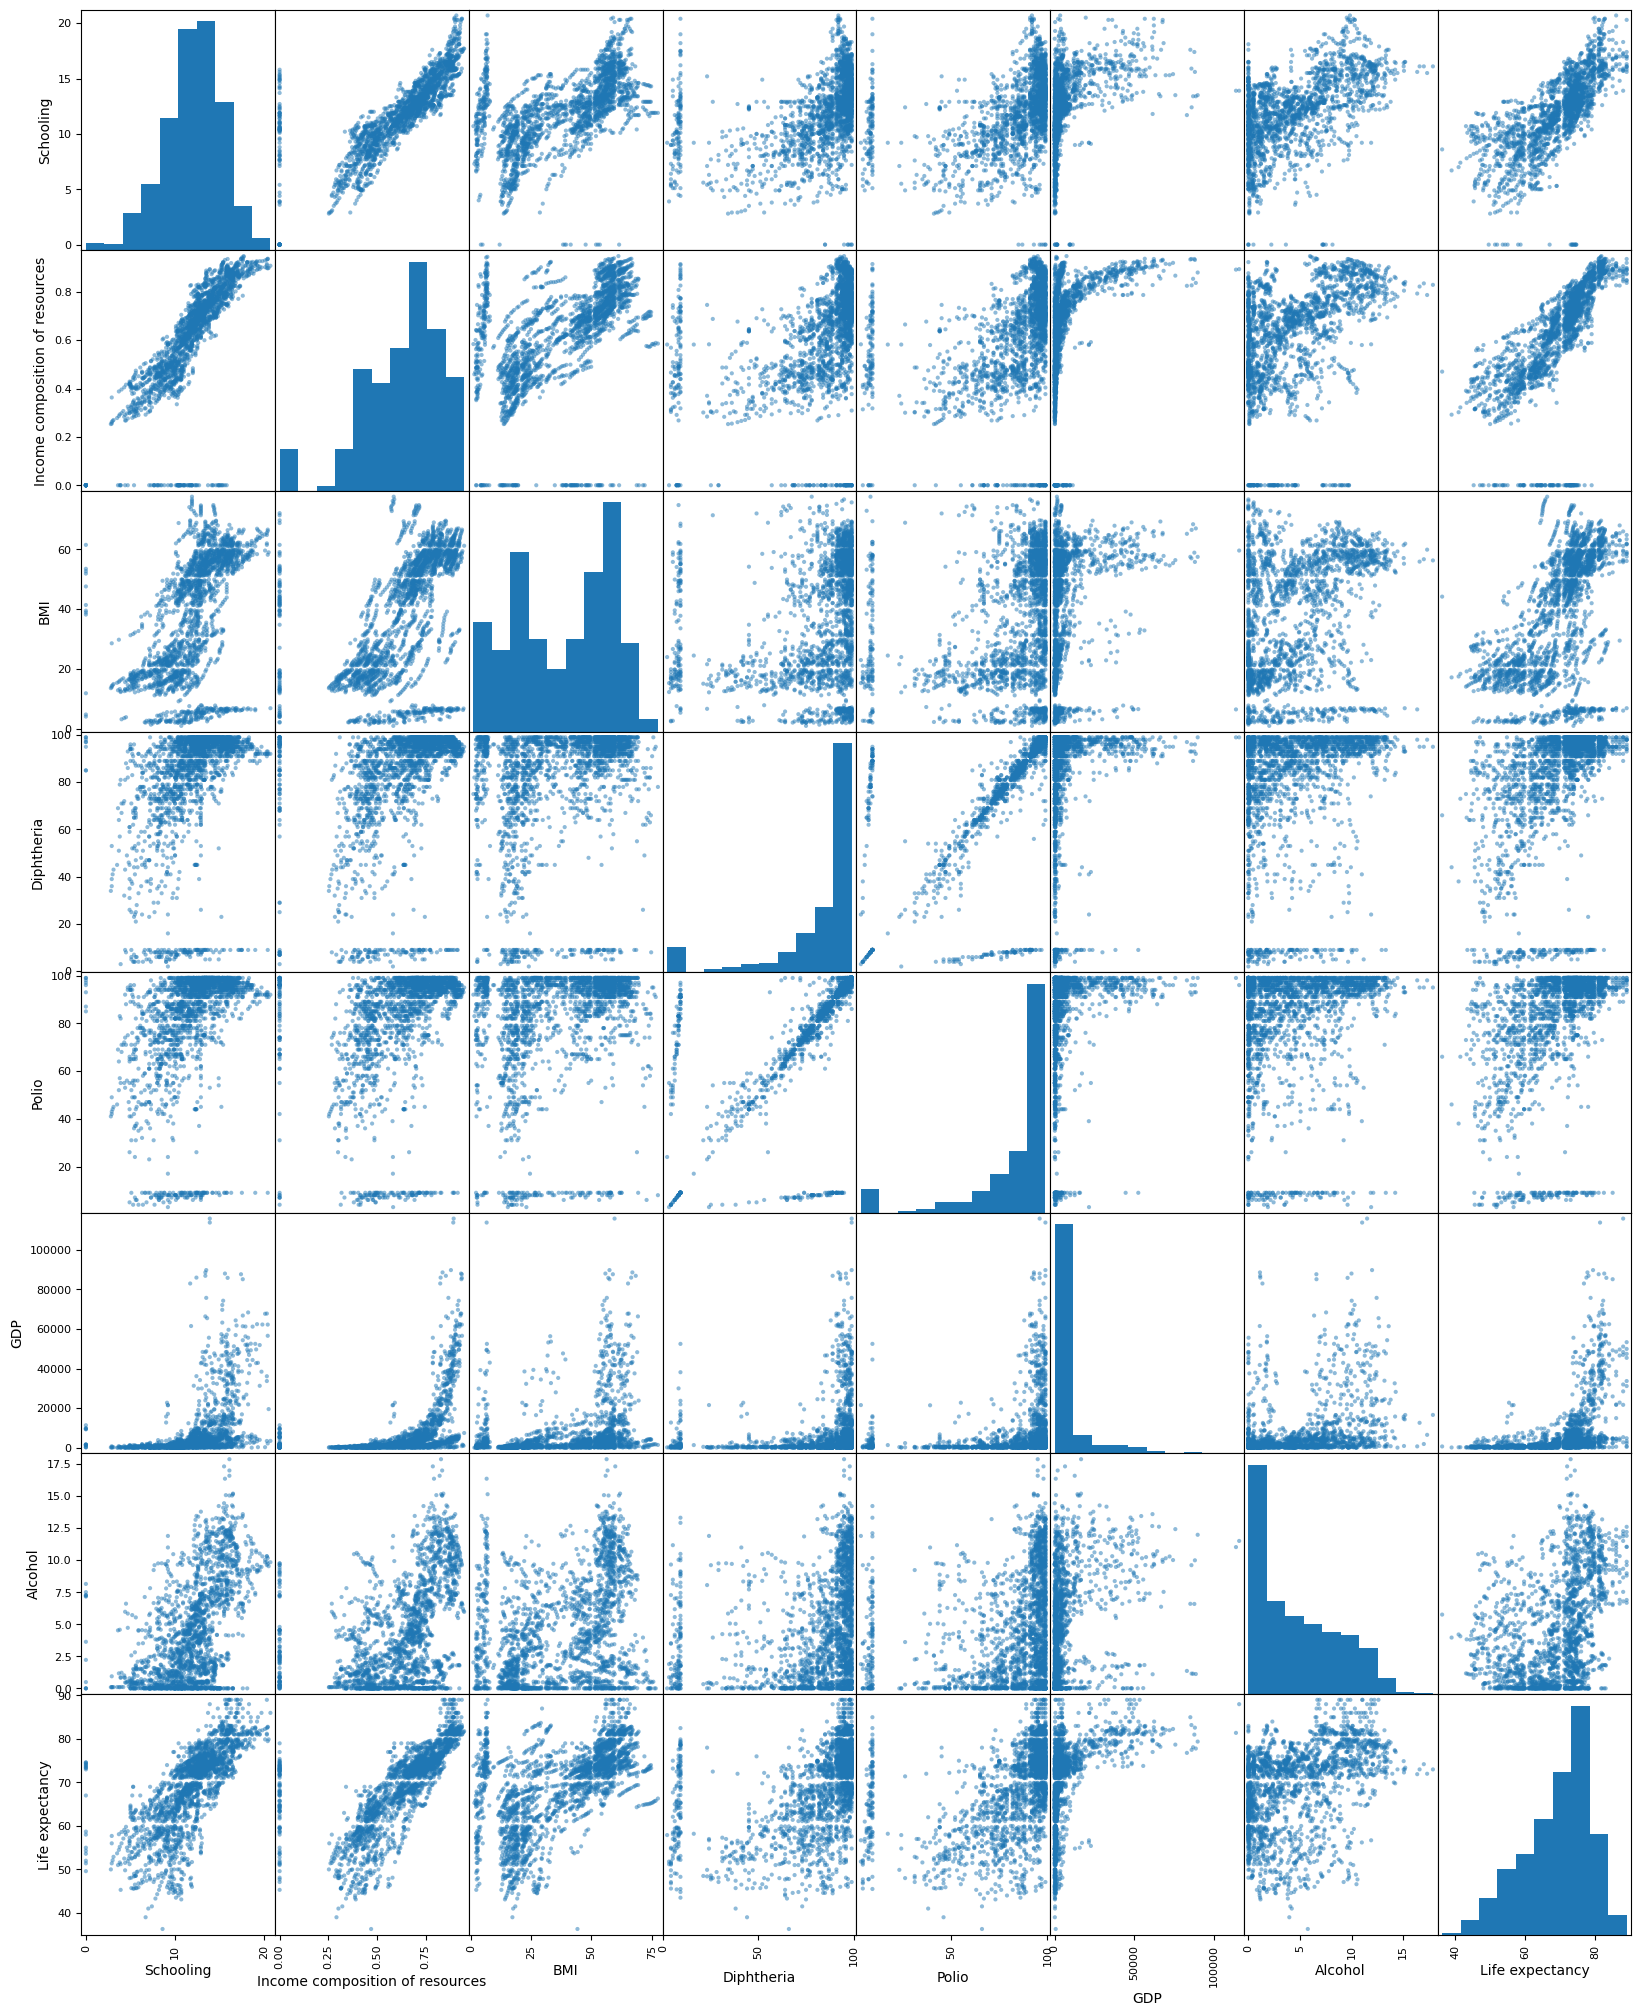

In [33]:
from pandas.plotting import scatter_matrix

attributes = ['Schooling', 'Income composition of resources', 'BMI', 'Diphtheria', 'Polio', 'GDP', 'Alcohol', 'Life expectancy']

scatter_matrix(train[attributes], figsize=(20,25))

<Axes: >

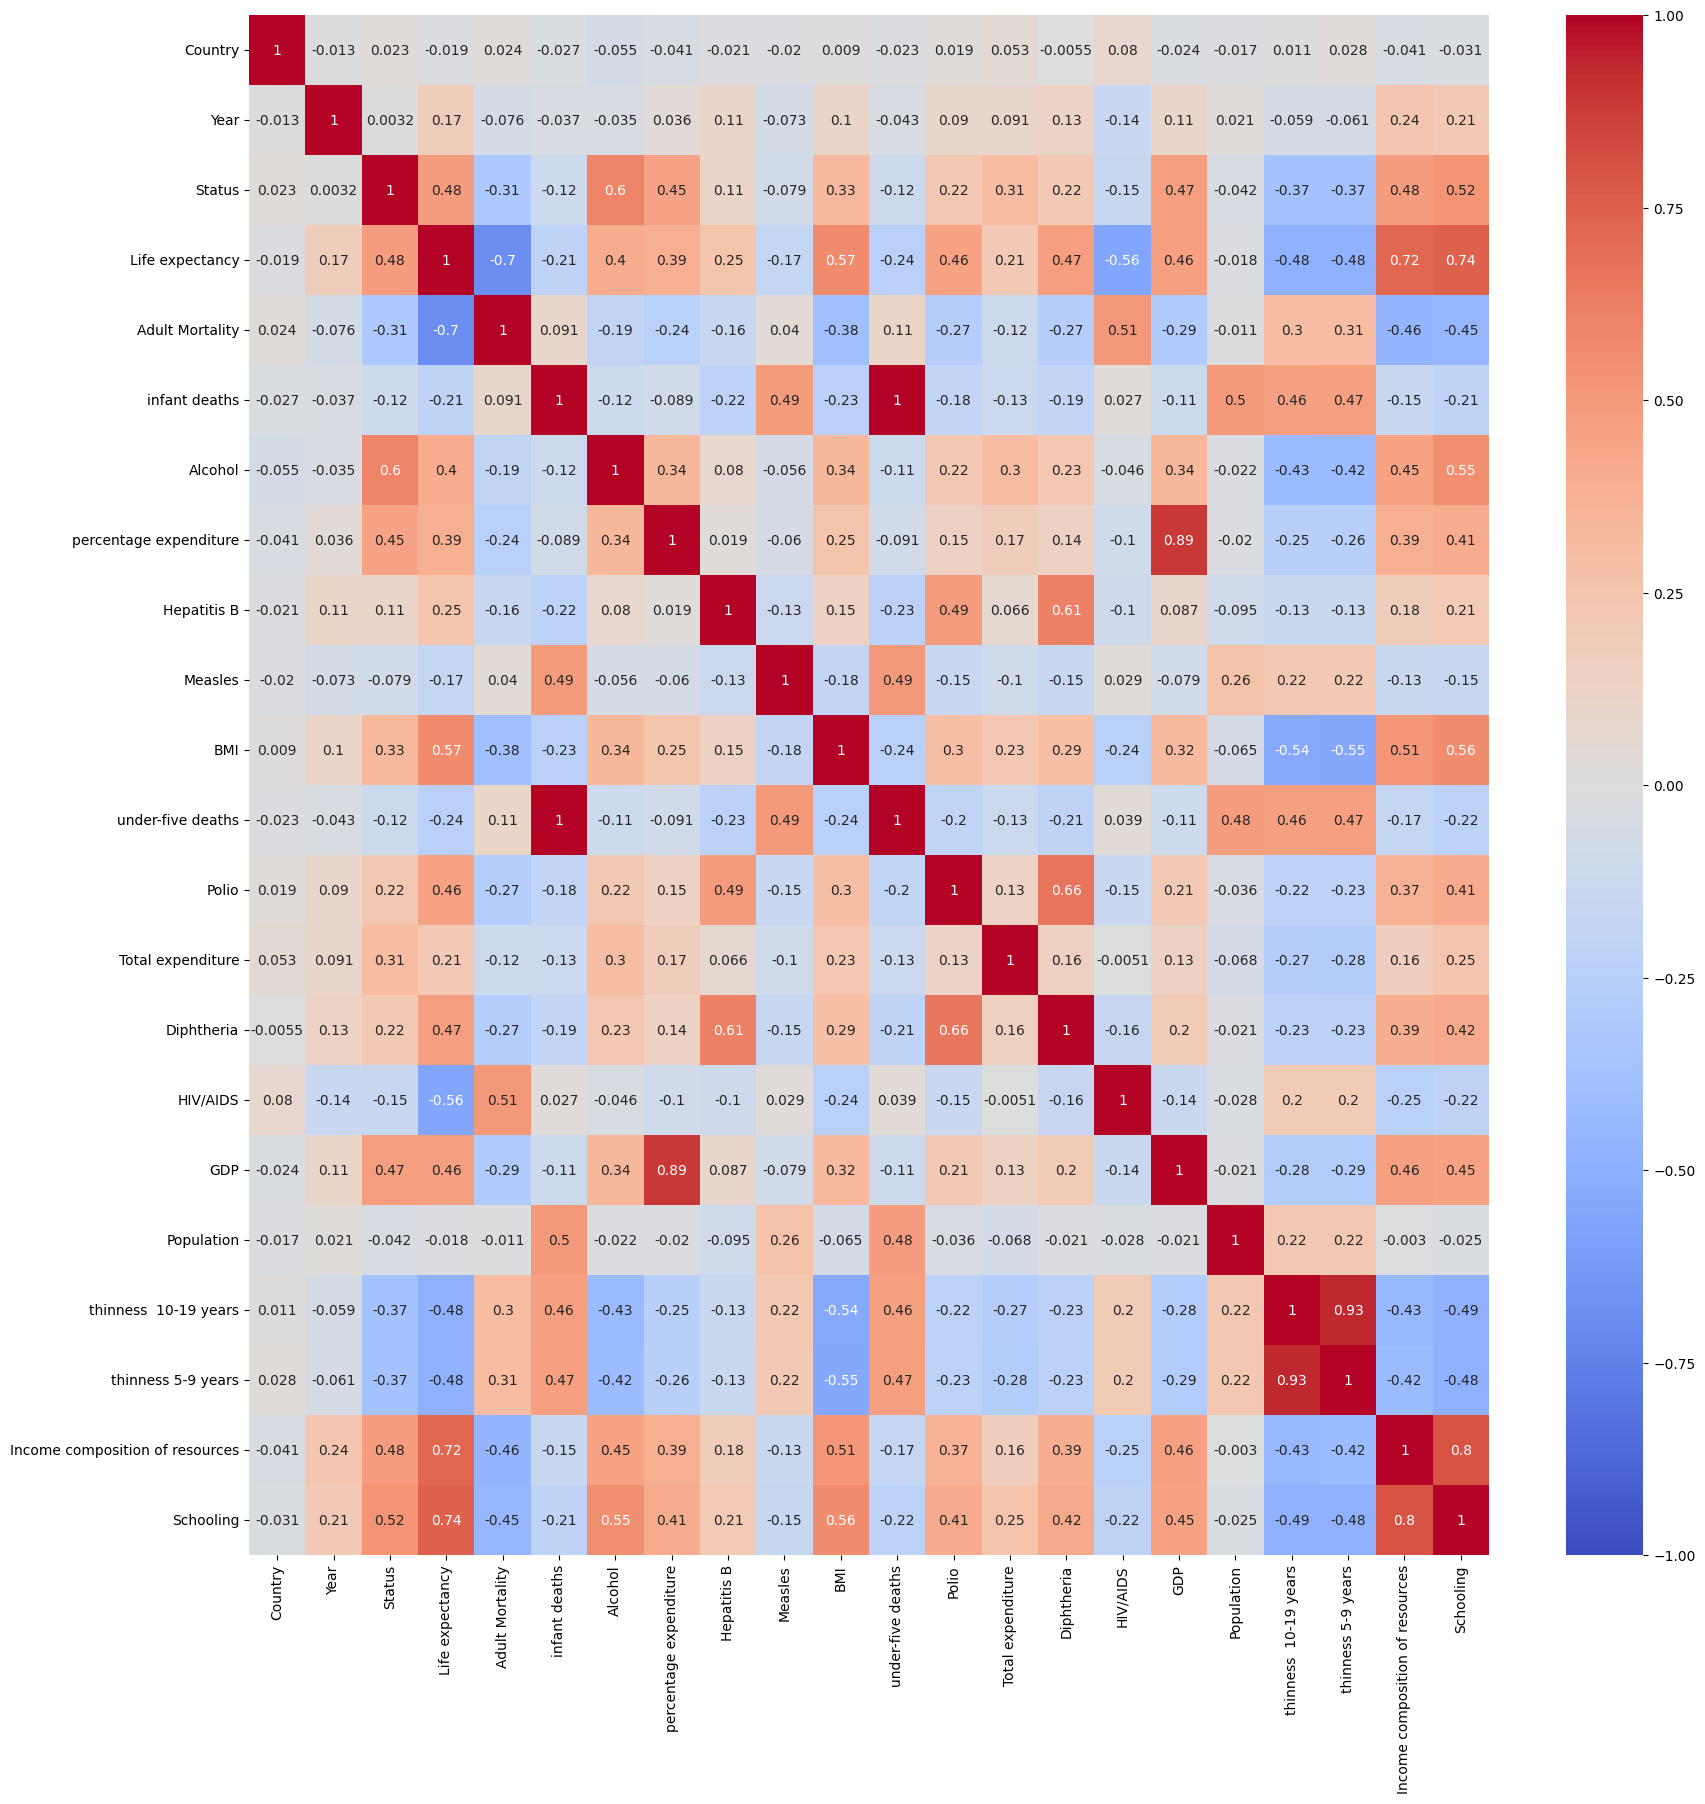

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train is your DataFrame containing the data
fig, ax = plt.subplots(figsize=(20, 20))  # Set the figure size
sns.heatmap(data=train.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=ax)

* 'Schooling', 'Income composition of resources', are highly +vely correralated with traget column as well as with each, so we will only keep Schooling
* 'thinness  10-19 years', 'thinness 5-9 years' are -vely correlated with target and highly +vely correlated with each other, so we will only keep thinness  10-19 years
* 'Adult Mortality', 'HIV/AIDS' is highly -vely correlated
* 'BMI', 'Status' is +vely correlated with target
* 'Diphtheria', 'Hepatitis B', 'Polio' - highly correlated with each other, so we will only keep 'Diphtheria'

In [35]:
features = ['Status', 'Adult Mortality', 'BMI', 'Diphtheria', 'HIV/AIDS', 'thinness  10-19 years', 'Schooling']
label = ['Life expectancy']
X_train = train[features]
y_train = train[label]
X_test = test[features]
y_test = test[label]

X_train.head()

Status  Adult Mortality   BMI  Diphtheria  HIV/AIDS  \
2268       1            126.0  58.3        91.0       0.1   
1680       1            179.0  26.4        88.0       0.1   
2785       1            376.0  19.6        86.0       7.4   
2512       2             62.0  56.5        98.0       0.1   
1090       1            275.0  26.3        87.0       3.2   

      thinness  10-19 years  Schooling  
2268                    2.1       14.0  
1680                    7.9       12.5  
2785                    7.3        NaN  
2512                    1.3       15.7  
1090                    7.1        9.2

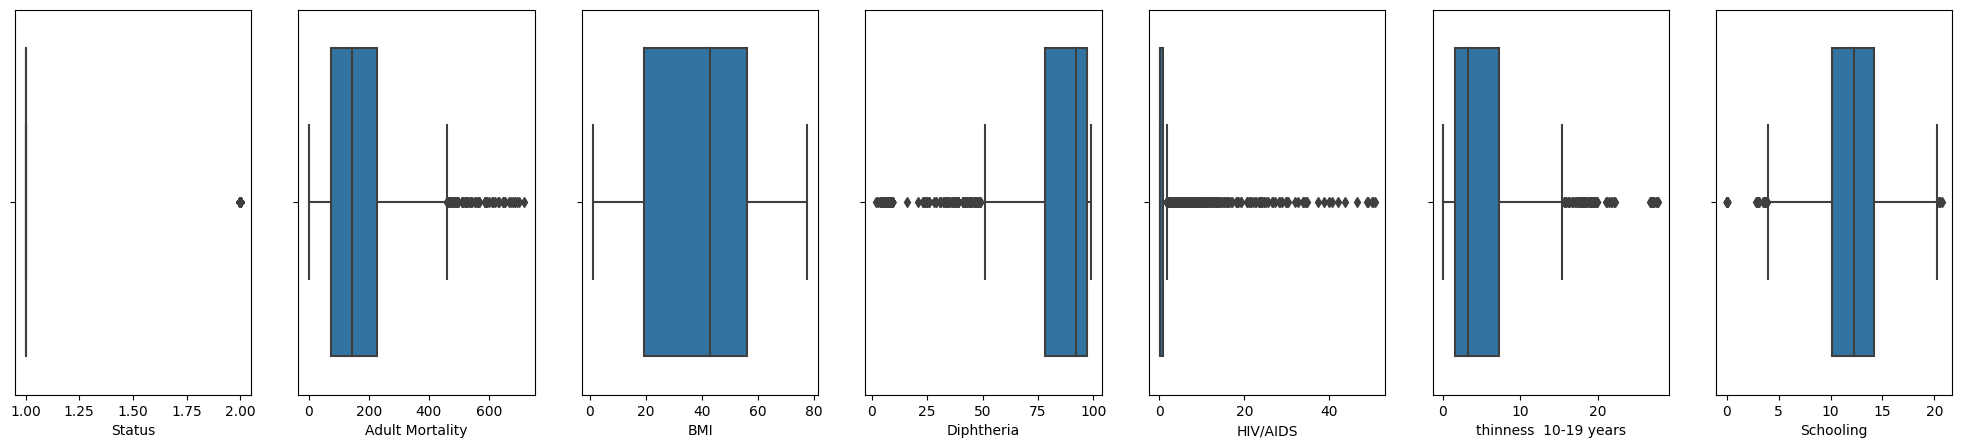

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=len(X_train.columns), figsize=(25, 5))

for i,col in enumerate(X_train.columns):
    sns.boxplot(data=train, x=col, ax=axes[i])

In [37]:
# Imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer()
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=imputer.get_feature_names_out())
X_train.isnull().sum()

Status                   0
Adult Mortality          0
BMI                      0
Diphtheria               0
HIV/AIDS                 0
thinness  10-19 years    0
Schooling                0
dtype: int64

In [38]:
X_train.columns

Index(['Status', 'Adult Mortality', 'BMI', 'Diphtheria', 'HIV/AIDS',
       'thinness  10-19 years', 'Schooling'],
      dtype='object')

In [39]:
import numpy as np
def remove_outliers(data, columns):
    for column in columns:        
        Q3 = np.quantile(data[column].to_numpy(),0.75)
        Q1 = np.quantile(data[column].to_numpy(),0.25)
        #print(Q1, Q3)
        IQR = Q3-Q1
        lower = Q1 - 1.5*IQR
        high = Q3 + 1.5*IQR
        #print(lower, high)
        data = data[data.apply(lambda row: row[column]>lower and row[column]<high , axis=1)]
    return data
x_train_wt_outliers = remove_outliers(X_train, ['Adult Mortality', 'Diphtheria','thinness  10-19 years'])
x_train_wt_outliers.head()

Status  Adult Mortality   BMI  Diphtheria  HIV/AIDS  thinness  10-19 years  \
0     1.0            126.0  58.3        91.0       0.1                    2.1   
1     1.0            179.0  26.4        88.0       0.1                    7.9   
2     1.0            376.0  19.6        86.0       7.4                    7.3   
3     2.0             62.0  56.5        98.0       0.1                    1.3   
4     1.0            275.0  26.3        87.0       3.2                    7.1   

   Schooling  
0       14.0  
1       12.5  
2        7.1  
3       15.7  
4        9.2

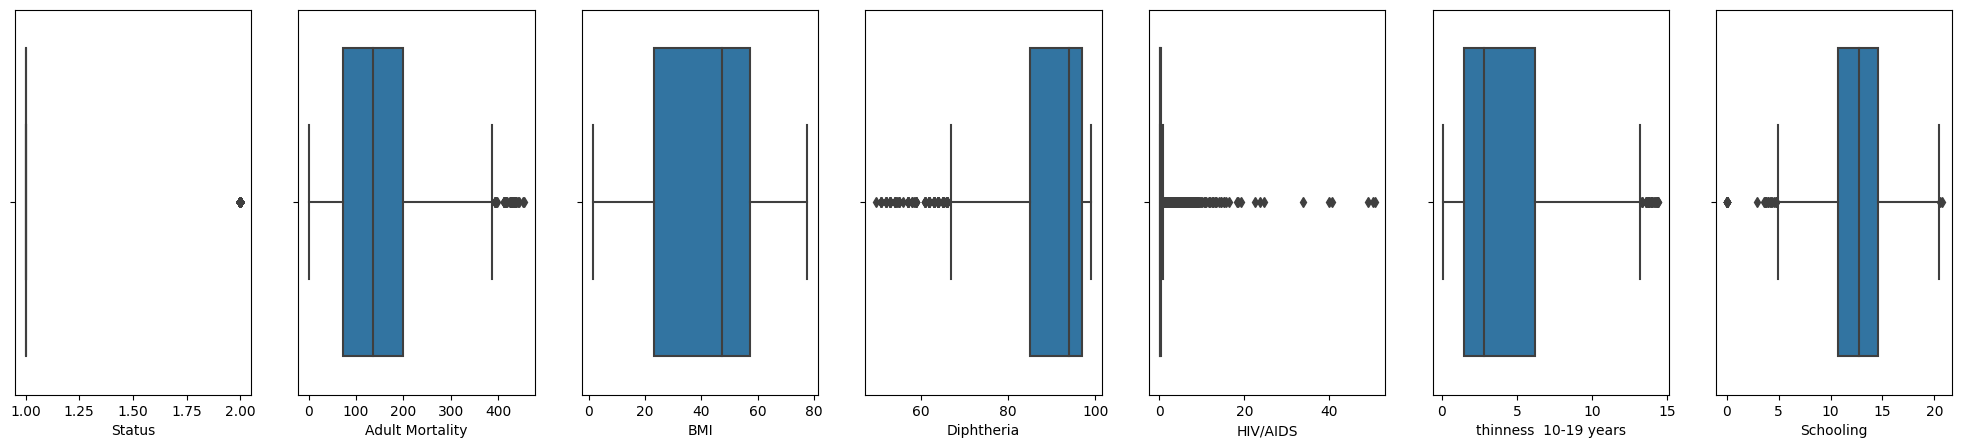

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=len(x_train_wt_outliers.columns), figsize=(25, 5))

for i,col in enumerate(x_train_wt_outliers.columns):
    sns.boxplot(data=x_train_wt_outliers, x=col, ax=axes[i])

array([[<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'thinness  10-19 years'}>],
       [<Axes: title={'center': 'Schooling'}>, <Axes: >, <Axes: >]],
      dtype=object)

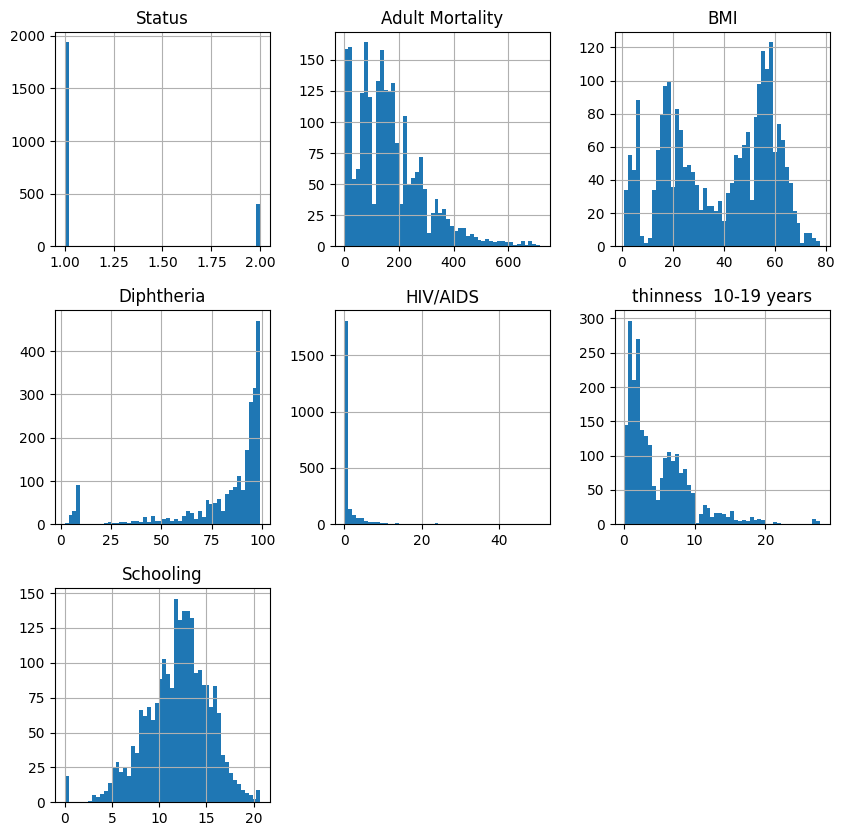

In [41]:
X_train.hist(bins=50, figsize=(10,10))

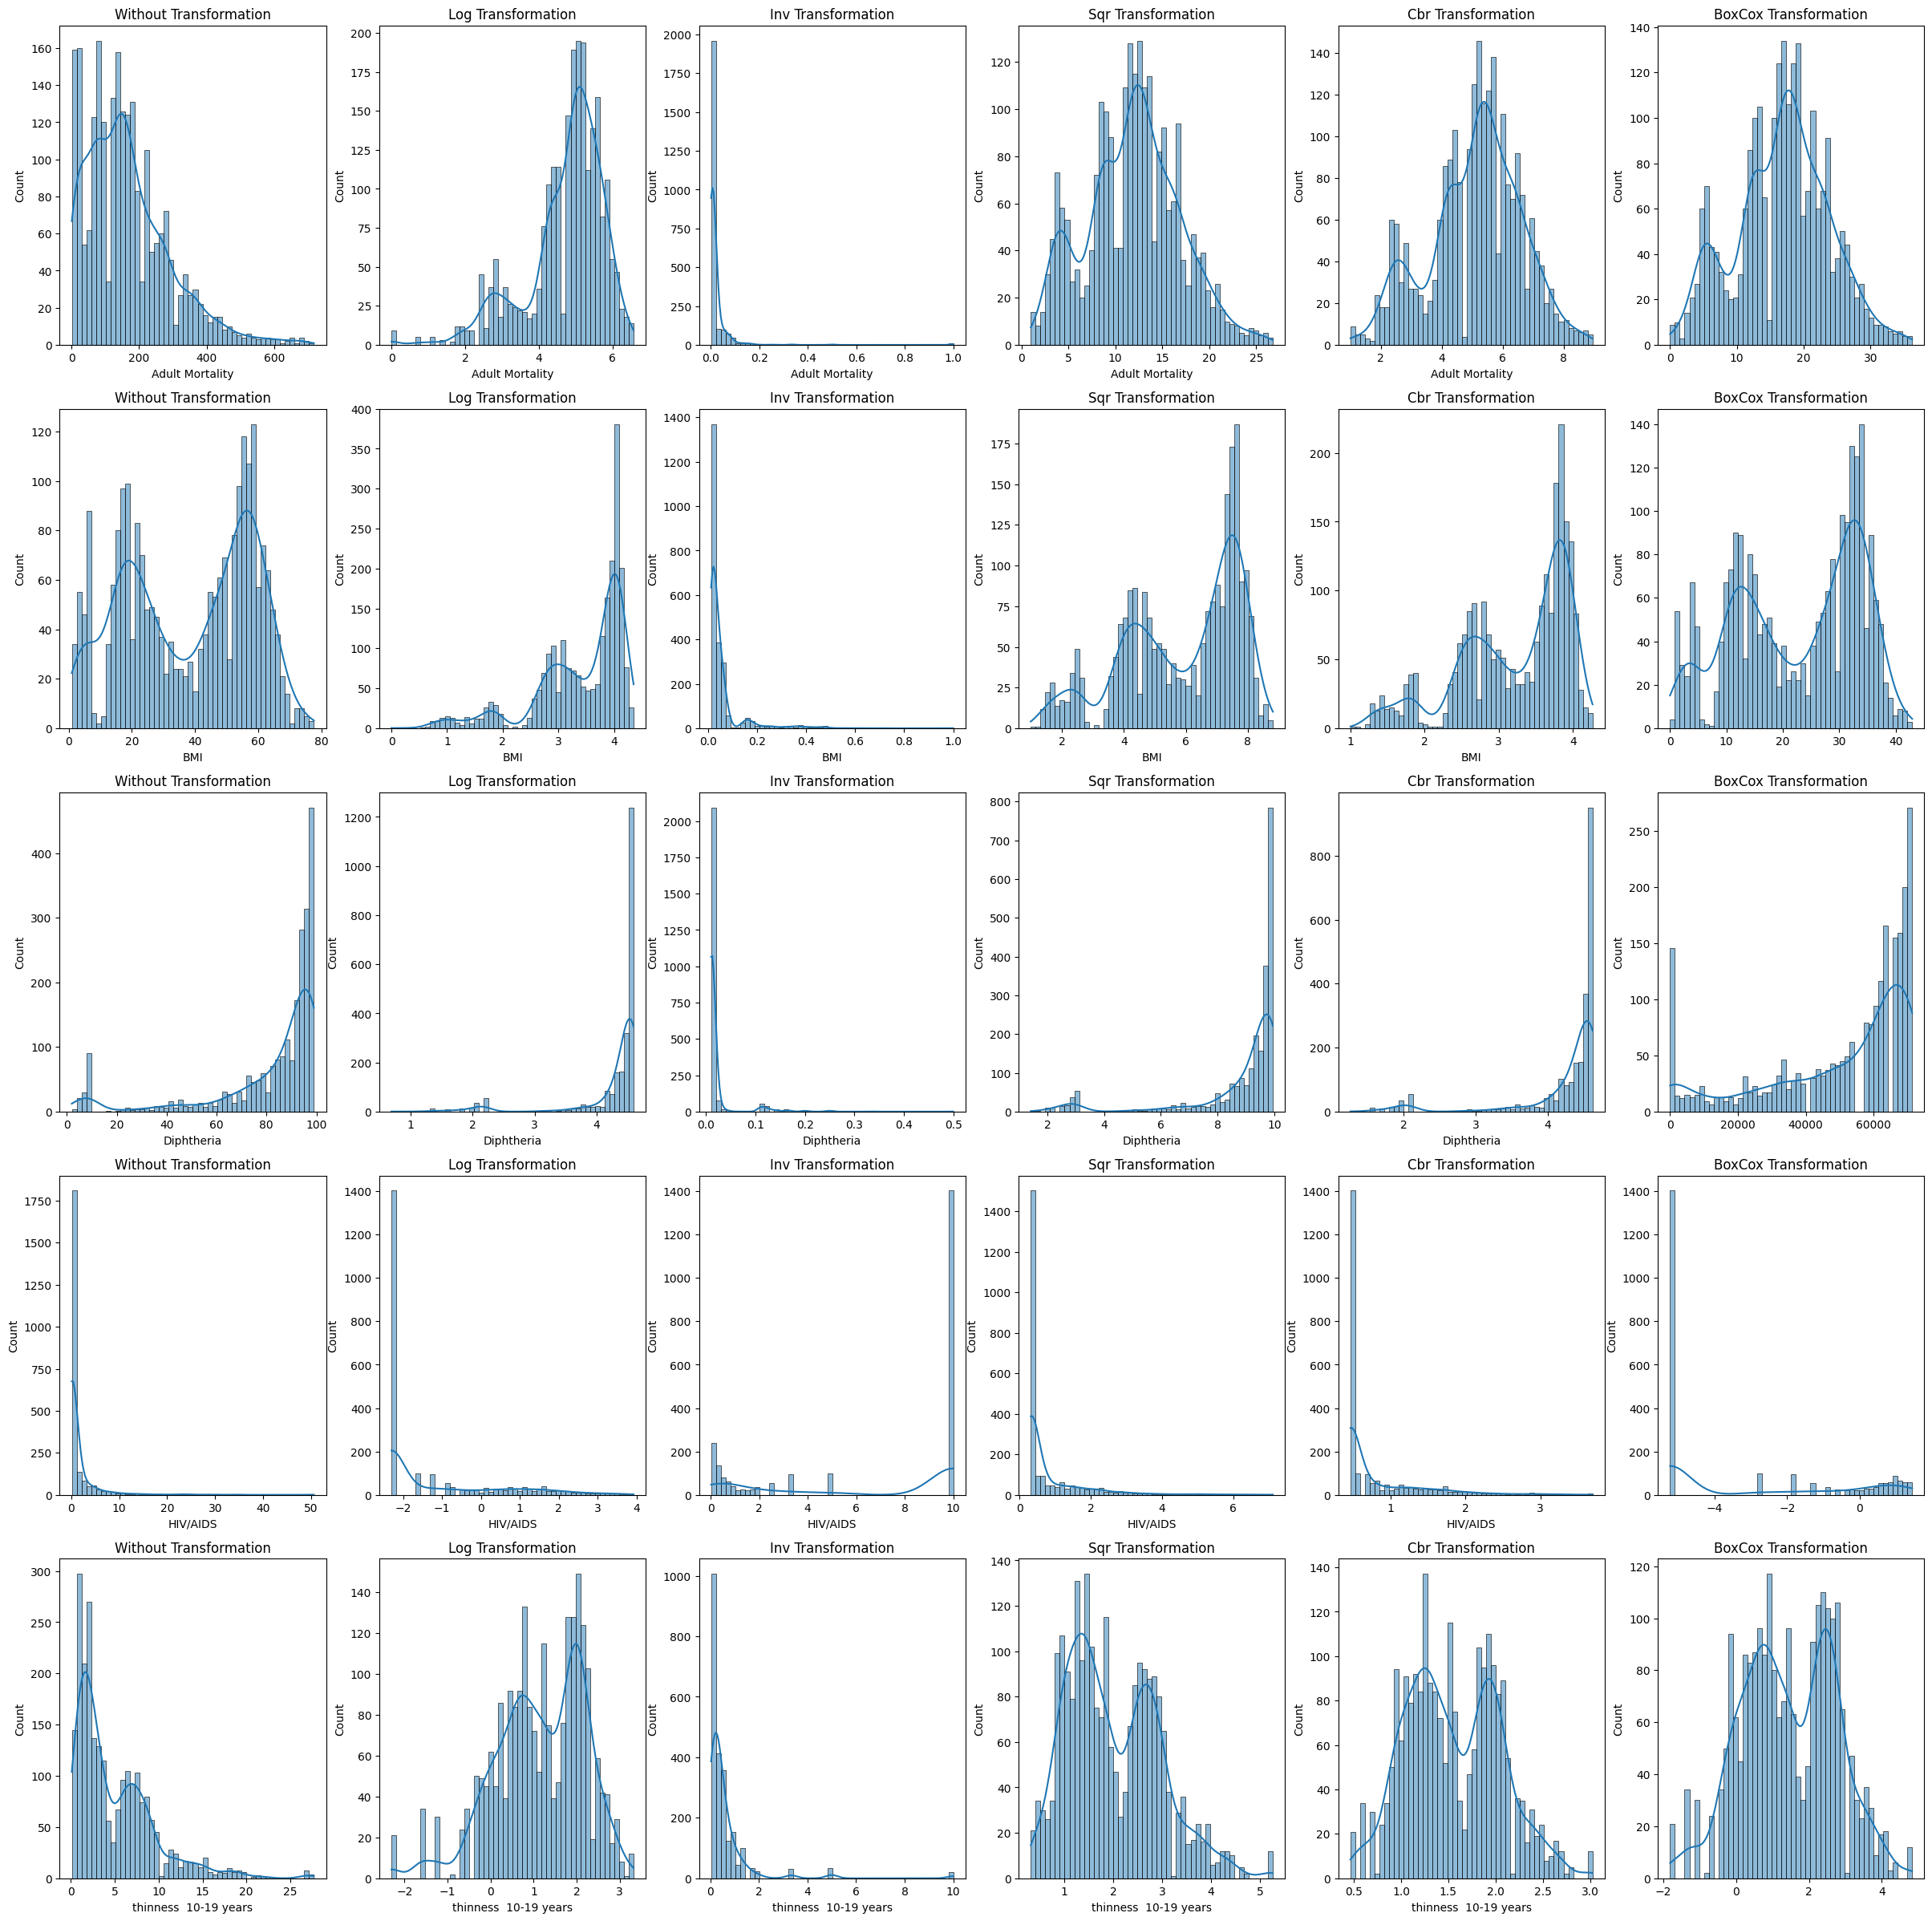

In [42]:
# Applying log transformation
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30, 30))
import numpy as np
from scipy import stats
# log_train = train.copy()
# cbr_train = train.copy()
def transformation(train):
    with pd.option_context('mode.use_inf_as_na', True):
        for i, col in enumerate(['Adult Mortality', 'BMI', 'Diphtheria', 'HIV/AIDS','thinness  10-19 years']):
            log_train = train[col].apply(lambda x: np.log(x))
            sqr_train = train[col].apply(lambda x: x**(1/2))
            inverse_train = train[col].apply(lambda x: 1/x)
            cbr_train = train[col].apply(lambda x: x**(1/3))
            boxcox, _ = stats.boxcox(train[col].dropna())

            sns.histplot(data=train, x=col, ax=axes[i][0], bins=50, kde=True)
            sns.histplot(data=log_train, ax=axes[i][1], bins=50, kde=True)
            sns.histplot(data=inverse_train, ax=axes[i][2], bins=50, kde=True)
            sns.histplot(data=sqr_train, ax=axes[i][3], bins=50, kde=True)
            sns.histplot(data=cbr_train, ax=axes[i][4], bins=50, kde=True)
            sns.histplot(data=boxcox, ax=axes[i][5], bins=50, kde=True)


            axes[i][0].set_title('Without Transformation')
            axes[i][1].set_title('Log Transformation')
            axes[i][2].set_title('Inv Transformation')
            axes[i][3].set_title('Sqr Transformation')
            axes[i][4].set_title('Cbr Transformation')
            axes[i][5].set_title('BoxCox Transformation')
transformation(X_train)

In [43]:
'''
Preprocess Pipeline

Categorical Column
    1. Label Encoding(Status)
Numerical Column
    1. Imputation
    2. Transformation - boxcox
    3. Scaling
Feature Selection

'''

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

catg_pipeline = make_pipeline(KNNImputer(), OneHotEncoder(drop='first'))
num_pipeline = make_pipeline(KNNImputer(), PowerTransformer(), RobustScaler())


preprocessing = ColumnTransformer(
    transformers=[
        ("num_preprocess", num_pipeline, ['Adult Mortality', 'BMI', 'Diphtheria', 'HIV/AIDS','thinness  10-19 years', 'Schooling']),
        #("Catg_Preprocess", catg_pipeline, ["Status"]),
    ],
    verbose=True,
    remainder='drop'
)
preprocessing

ColumnTransformer(transformers=[('num_preprocess',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('powertransformer',
                                                  PowerTransformer()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Adult Mortality', 'BMI', 'Diphtheria',
                                  'HIV/AIDS', 'thinness  10-19 years',
                                  'Schooling'])],
                  verbose=True)

In [44]:
preprocessed = preprocessing.fit_transform(X_train)
preprocessing.get_feature_names_out()

[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


array(['num_preprocess__Adult Mortality', 'num_preprocess__BMI',
       'num_preprocess__Diphtheria', 'num_preprocess__HIV/AIDS',
       'num_preprocess__thinness  10-19 years',
       'num_preprocess__Schooling'], dtype=object)

In [45]:
preprocessing.transform(X_test)

array([[ 1.33484427,  0.11009963, -0.75275211,  1.66099176,  0.61135656,
         0.12096584],
       [-1.36391536, -0.74362472,  0.22772645,  0.        ,  1.22510456,
        -0.66081725],
       [-0.68985867, -0.26396874,  0.28727032,  0.        , -0.27876585,
         0.78065784],
       ...,
       [-1.10795973, -1.19287675, -0.40696464,  0.73058133,  0.95812701,
        -0.72496933],
       [ 0.63768719, -0.44296988,  0.28727032,  1.33086049,  0.56501571,
        -0.7672731 ],
       [ 0.12249365, -0.52334878, -0.90403219,  0.        ,  1.26693792,
        -1.03287595]])

# 6. Model Training

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(X_train, y_train)

[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('powertransformer',
                                                                   PowerTransformer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Adult Mortality', 'BMI',
                                                   'Diphtheria', 'HIV/AIDS',
                                                   'thinness  10-19 years',
                                                   'Schooling'])],
                                   verbose=True)),
                ('linearregression', LinearRegression())])

In [47]:
from sklearn.metrics import mean_squared_error,  r2_score
mse = mean_squared_error(y_train, lr_model.predict(X_train))
print(mse)

16.904663056819675


In [48]:
def adjusted_r2(y_true, y_pred, p):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2
adjusted_r2(y_train, lr_model.predict(X_train), X_train.shape[1])

0.815076631036909

In [49]:
from sklearn.tree import DecisionTreeRegressor

dt_model = make_pipeline(preprocessing, DecisionTreeRegressor())
dt_model.fit(X_train, y_train)
mse = mean_squared_error(y_train, dt_model.predict(X_train))
print("MSE: ",mse)
adj_r2 = adjusted_r2(y_train, dt_model.predict(X_train), X_train.shape[1])
print(f"Adj R2: {adj_r2}")

[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
MSE:  0.0
Adj R2: 1.0


In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_model = make_pipeline(preprocessing, RandomForestRegressor())
rf_model.fit(X_train, y_train)
mse = mean_squared_error(y_train, rf_model.predict(X_train))
print("MSE: ",mse)
adj_r2 = adjusted_r2(y_train, rf_model.predict(X_train), X_train.shape[1])
print(f"Adj R2: {adj_r2}")

[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE:  0.5272465508112737
Adj R2: 0.9942323483099028


In [51]:
from sklearn.model_selection import cross_val_score
for model in [lr_model, dt_model, rf_model]:
    rmses = -cross_val_score(
            estimator=model,
            X=X_train,
            y=y_train,
            scoring='neg_root_mean_squared_error',
            cv=10
        )

    print(pd.Series(rmses).describe())

[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
count    10.000000
mean      4.121942
std       0.241668
min       3.825462
25%       3.902527
50%       4.142617
75%       4.239757
max       4.583494
dtype: float64
[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s
[ColumnTransformer]  (1 of 1) Processing num_preproc

c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


count    10.000000
mean      1.946983
std       0.213221
min       1.612191
25%       1.862064
50%       1.921177
75%       2.031138
max       2.329140
dtype: float64


In [52]:
def adjusted_r2(y_true, y_pred, p):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

def validate(model, X, y):
    print(type(model[1]))
    mse = mean_squared_error(y, model.predict(X))
    print(f"MSE: {mse}")
    adj_r2 = adjusted_r2(y, model.predict(X), X.shape[1])
    print(f"Adj R2: {adj_r2}")

    
for model in [lr_model, dt_model, rf_model]:
    print('\nTrain')
    validate(model,X_train, y_train)
    print('\nTest')
    validate(model,X_test, y_test)


Train
<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 16.904663056819675
Adj R2: 0.815076631036909

Test
<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 15.448149989104785
Adj R2: 0.8192445509340578

Train
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE: 0.0
Adj R2: 1.0

Test
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE: 6.185443686006825
Adj R2: 0.9276254663552078

Train
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 0.5272465508112737
Adj R2: 0.9942323483099028

Test
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 2.9842434351535836
Adj R2: 0.9650820154760463


In [53]:
rf_model.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('num_preprocess',
                                    Pipeline(steps=[('knnimputer', KNNImputer()),
                                                    ('powertransformer',
                                                     PowerTransformer()),
                                                    ('robustscaler',
                                                     RobustScaler())]),
                                    ['Adult Mortality', 'BMI', 'Diphtheria',
                                     'HIV/AIDS', 'thinness  10-19 years',
                                     'Schooling'])],
                     verbose=True)),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('num_preprocess',
                                  Pipeline(steps=[('knnimputer', KNNImputer()),
                                                  ('powert

In [55]:
from sklearn.model_selection import GridSearchCV

# To get the list of params run list(pipeline.get_params().keys())
param_grid = [
    {
        'randomforestregressor__max_depth':[5,8,10,12,15],
        'randomforestregressor__max_features':[3,4,5,],
        'randomforestregressor__criterion':["squared_error","absolute_error"]
    }        
]
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.1s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[ColumnTransformer]  (1 of 1) Processing num_preprocess, total=   0.0s


c:\Users\VICTUS\anaconda3\envs\deeplr\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_preprocess',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer()),
                                                                                         ('powertransformer',
                                                                                          PowerTransformer()),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['Adult '
                                                                          'Mortality',
                                                                          'BMI',
                                                                          'Diphtheria',
                                                                          'HIV/AIDS',
                                                                          'thinness  '
                                                                          '10-19 '
                                                                          'years',
                                                                          'Schooling'])],
                                                          verbose=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid=[{'randomforestregressor__criterion': ['squared_error',
                                                               'absolute_error'],
                          'randomforestregressor__max_depth': [5, 8, 10, 12,
                                                               15],
                          'randomforestregressor__max_features': [3, 4, 5]}],
             scoring='neg_root_mean_squared_error')

In [56]:
grid_search.best_params_

{'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': 12,
 'randomforestregressor__max_features': 4}

In [57]:
final_model = grid_search.best_estimator_
validate(final_model, X_train, y_train)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 0.8691251744845694
Adj R2: 0.9904924721199052


In [58]:
validate(final_model, X_test, y_test)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 2.9658400644865113
Adj R2: 0.9652973493206556


In [59]:
import joblib
joblib.dump(final_model, 'life_expectancy_model.pkl')

['life_expectancy_model.pkl']